# **Thank You for opening this notebook!!!**
## **If you find this notebook useful then please upvote.**

# Introduction to Exploritary Data Analysis
Analyzing a dataset typically involves several key steps :
1. [Step 0: Imports and Reading data](#1)
2. [Step 1: data Understanding](#2)
3. [Step 2: data Prep](#3)
4. [Step 3: Feature Understanding](#4)
5. [Step 4: Feature Relationships](#5)
6. [Step 5: Analyse Hypothese](#6)
7. [Step 6: data Cleaning](#7)
8. [Step 7: Model Building (If Applicable):](#8)
9. [Step 8: Model Evaluation:](#9)
10. [Step 9: Make Pipline:](#10)
11. [Step 10: Feature Engineering:](#11)
12. [Step 11: Feature Scalling:](#12)


# [Step 0: Imports and Reading data]()<a id="1"></a> <br>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sc
import statistics as st
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
# plt.style.use('dark_background')
plt.style.use('ggplot')

df = pd.read_csv('D:\Paractical data scientist\StudentsPerformance\StudentsPerformance.csv')
df = df.copy()

# [Step 1: data Understanding]()<a id="2"></a> <br>
- Analysis the shape : We'll just focus on the form of data : Ndr of rows & columns : (150, 5)

In [81]:
df.drop_duplicates(inplace = True)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [82]:
df.shape

(1000, 8)

In [83]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# [Step 2: data Preperation]()<a id="3"></a> <br>

- Dropping irrelevant columns and rows

In [84]:
df["mean score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [85]:
df.drop(['math score','reading score', 'writing score'], axis=1, inplace=True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,female,group B,bachelor's degree,standard,none,73.0
1,female,group C,some college,standard,completed,82.0
2,female,group B,master's degree,standard,none,93.0
3,male,group A,associate's degree,free/reduced,none,49.0
4,male,group C,some college,standard,none,76.0


- - visualisation val missing : (visualisation of array[True, False] in order to detect nan(% of emptying))

<Axes: >

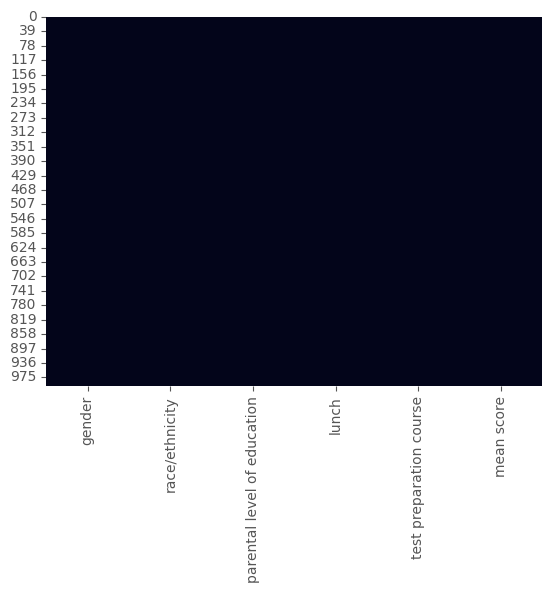

In [86]:
sns.heatmap(df.isna(), cbar=False) 

# [Step 3: Feature Understanding]()<a id="4"></a> <br>

- - Analyse target : (reg or classif) / (variables type:'numerical' or 'categorical') / (equilibre or not) classif non equilibre 10% of var1

Text(0.5, 0, 'mean score')

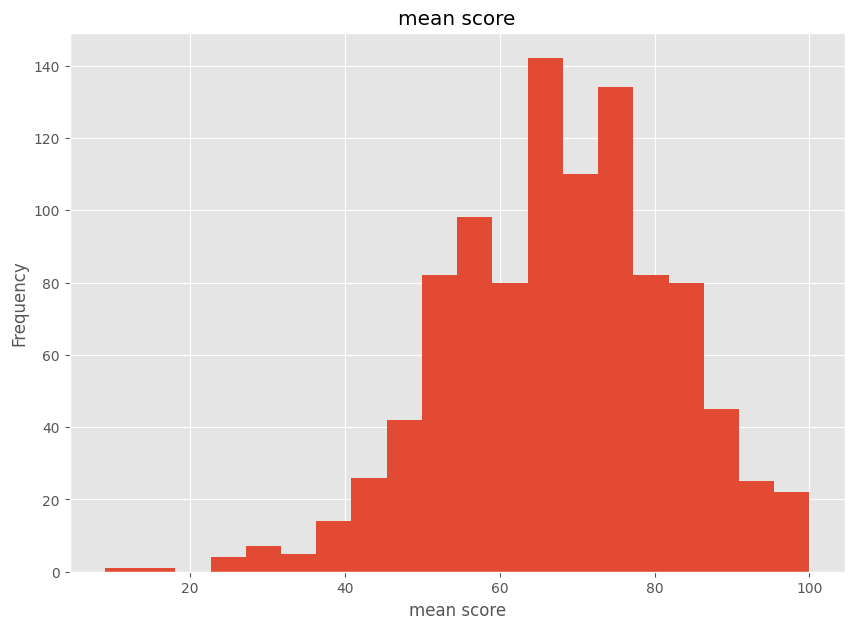

In [87]:
plt.figure(figsize=(10,7))
ax = df['mean score'].plot(kind='hist',bins=20,title='mean score')
ax.set_xlabel('mean score')

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

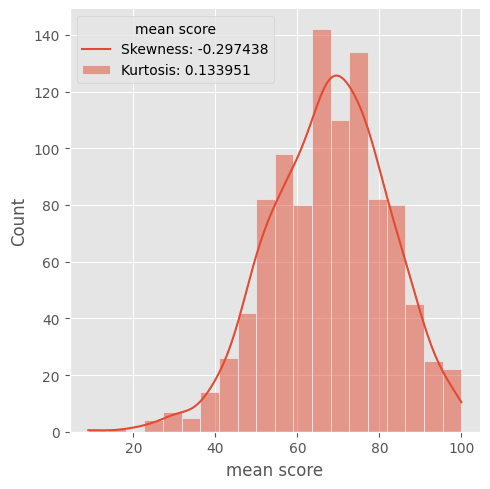

In [88]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = sns.displot(df, x=col,kde=True ,bins=20)
    plt.legend(title=col, loc='upper left', labels=["Skewness: %f" % df[col].skew(),"Kurtosis: %f" % df[col].kurt()])
    plt.show(ax)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


gender-------------------------------------------- ['female' 'male']


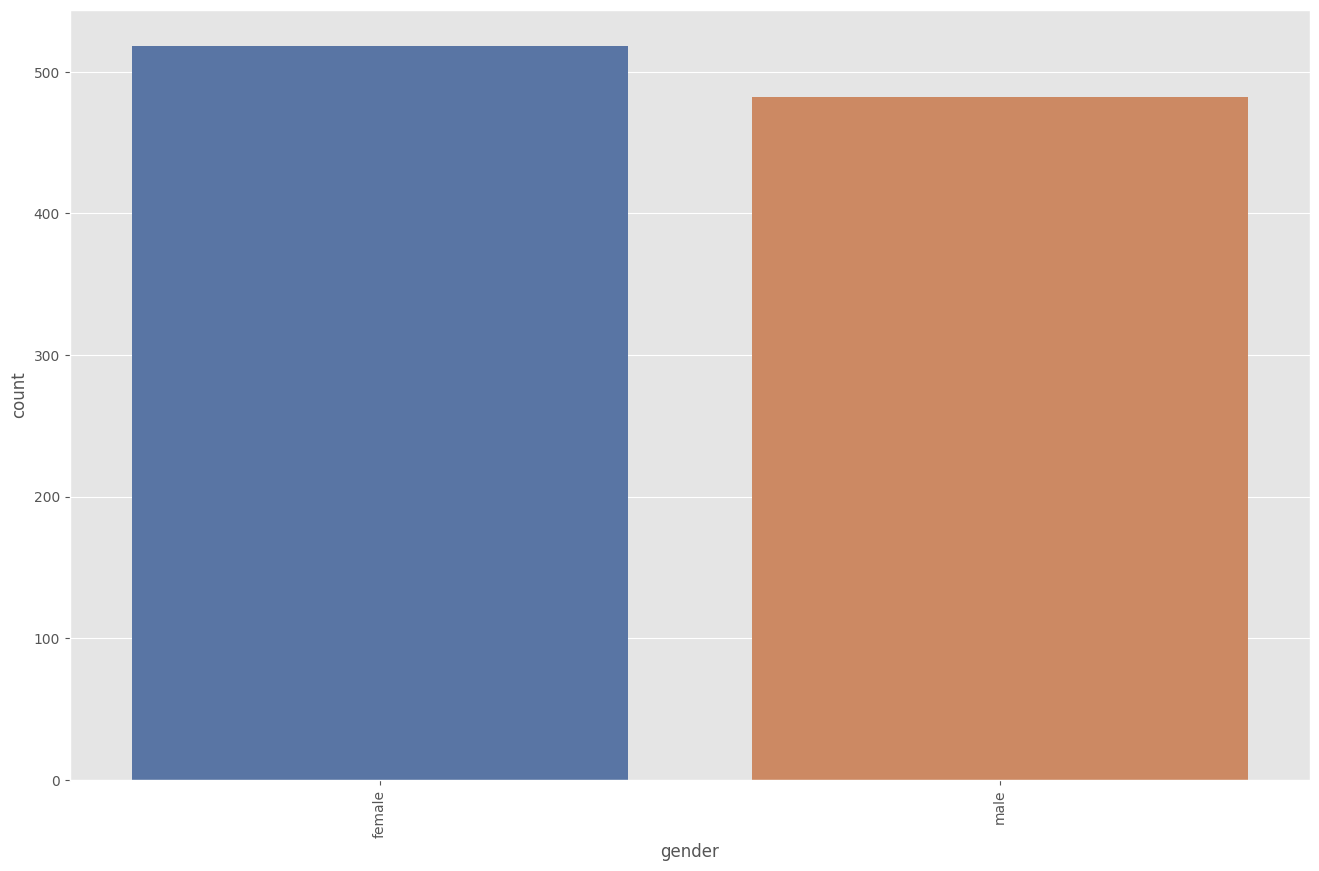

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


race/ethnicity------------------------------------ ['group B' 'group C' 'group A' 'group D' 'group E']


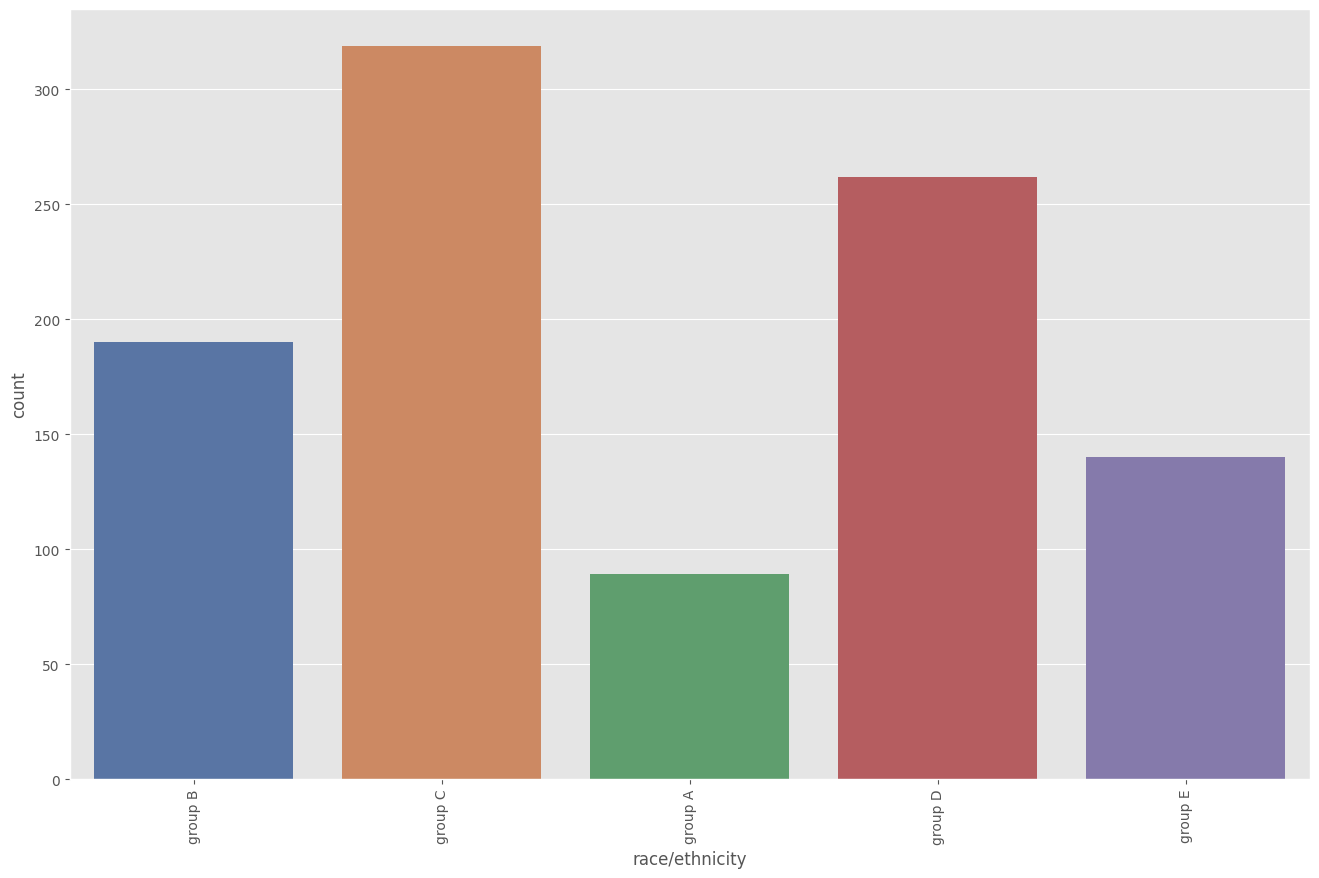

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


parental level of education----------------------- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


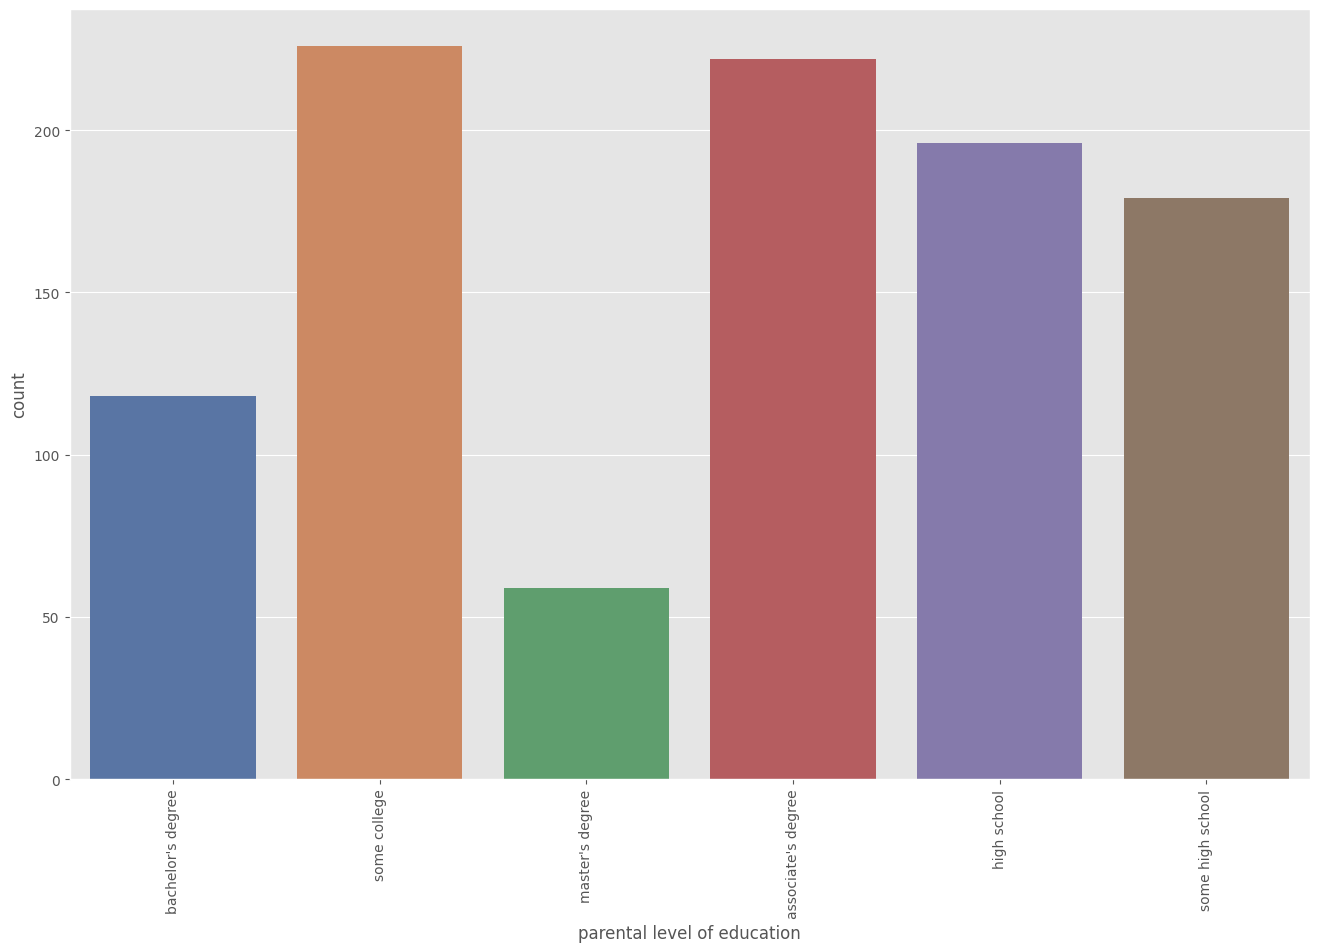

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


lunch--------------------------------------------- ['standard' 'free/reduced']


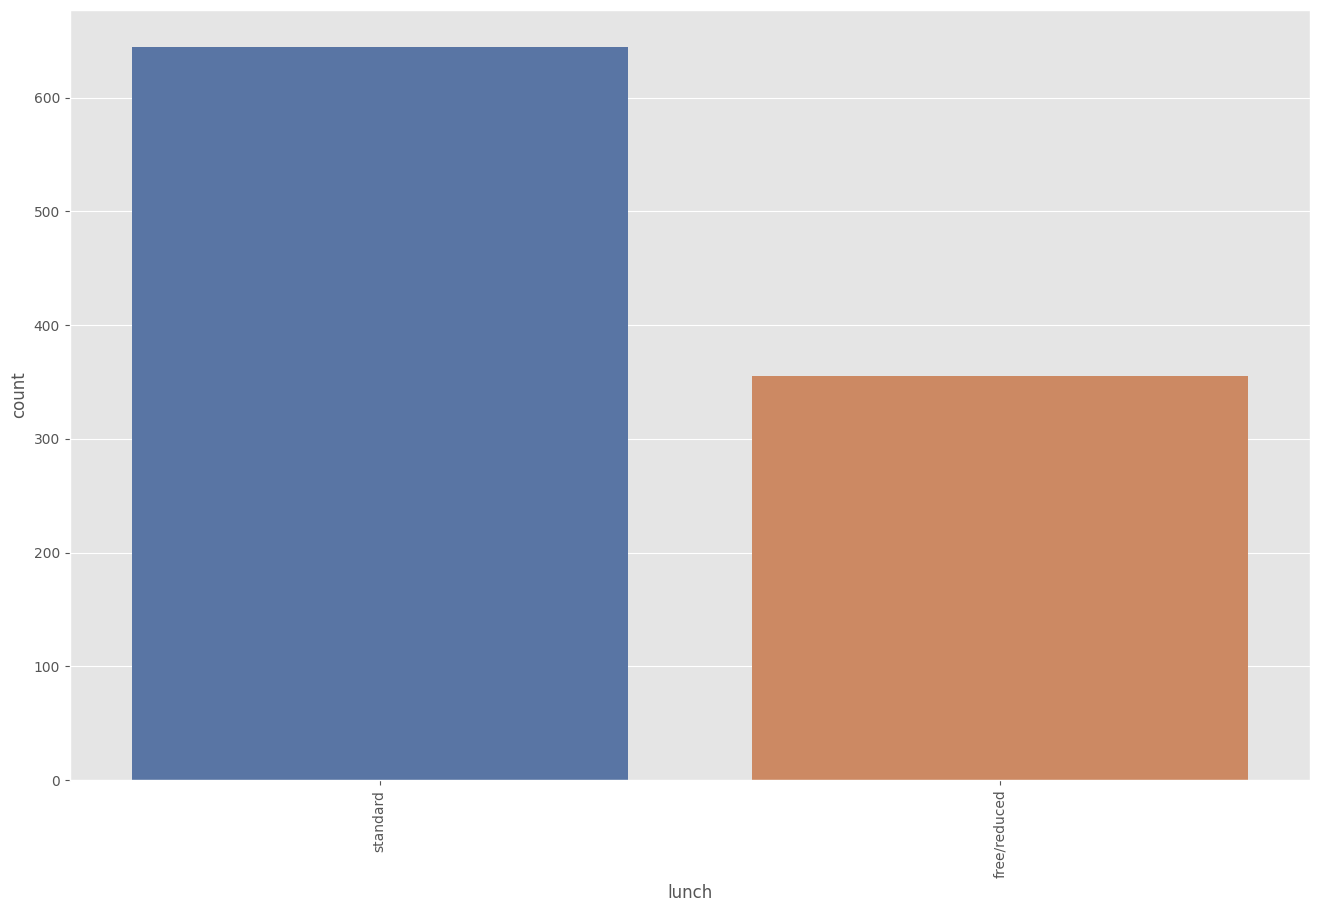

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


test preparation course--------------------------- ['none' 'completed']


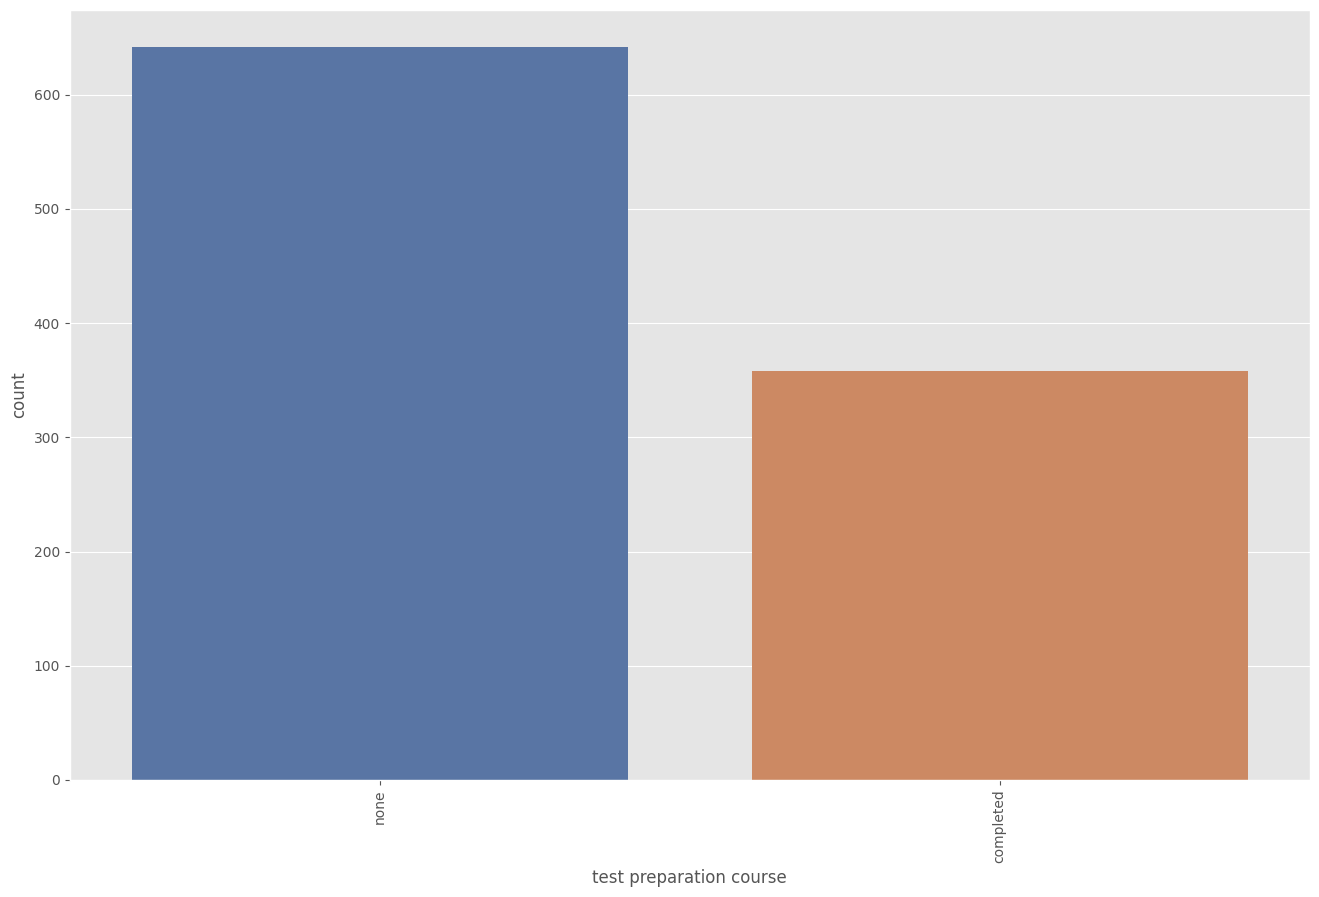

In [89]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')
    plt.figure(figsize = (16,10))
    ax = sns.countplot(x=df[col], hue=df[col], palette='deep')
    ax.legend().set_visible(False)
    plt.xticks(rotation=90)
    plt.show()

- - Verifie outliers

<Axes: xlabel='mean score'>

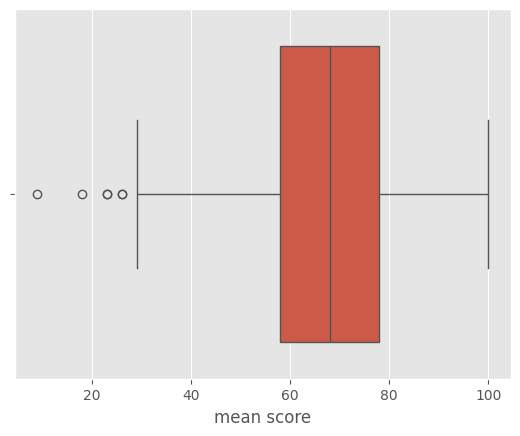

In [90]:
sns.boxplot(x=df['mean score'])    

# [Step 4: Feature Relationships]()<a id="5"></a> <br>

- - Relation Column/Column : (very usefull)

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_17132\3506379642.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

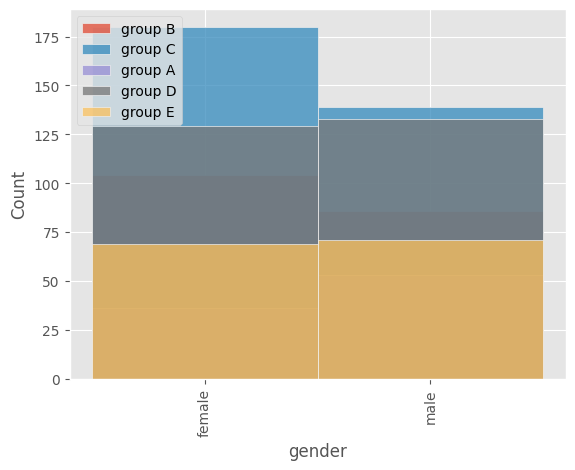

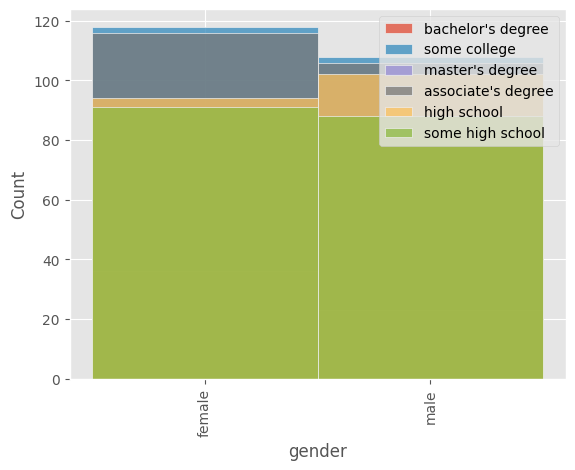

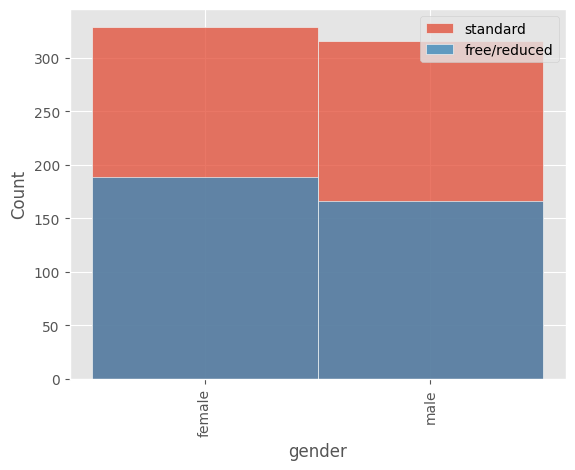

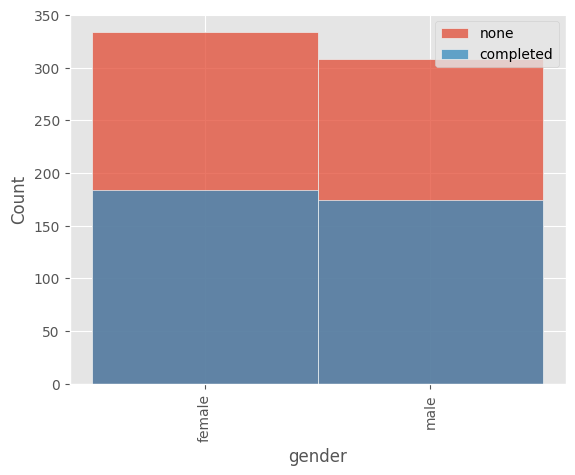

<Figure size 640x480 with 0 Axes>

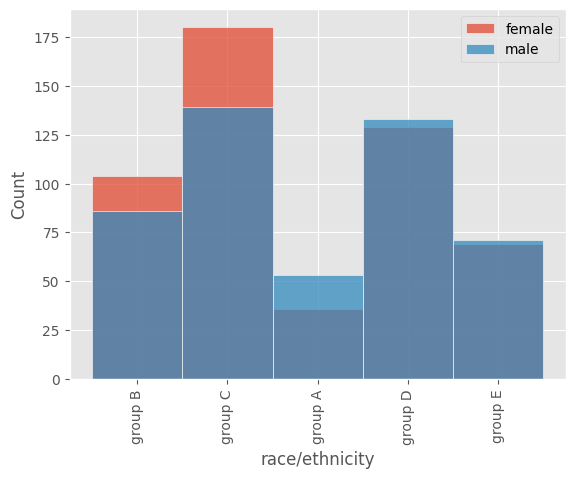

<Figure size 640x480 with 0 Axes>

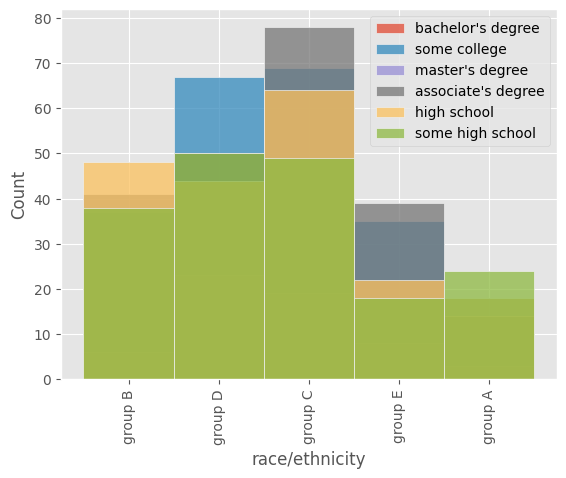

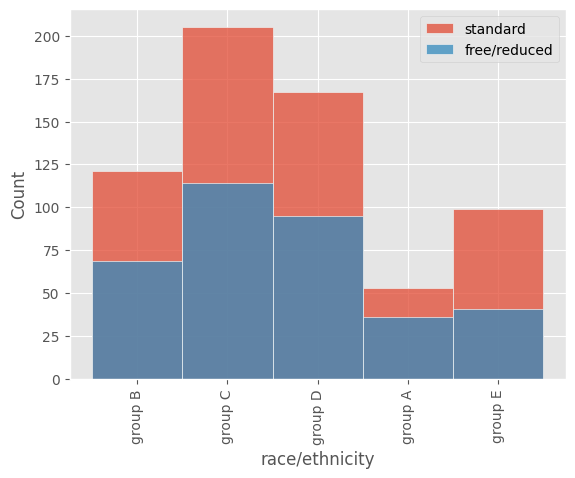

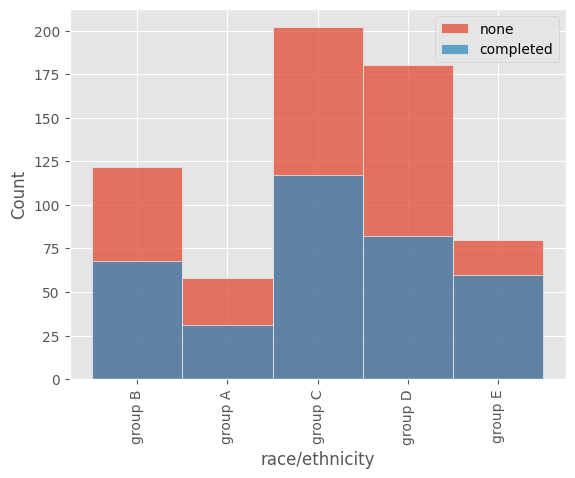

<Figure size 640x480 with 0 Axes>

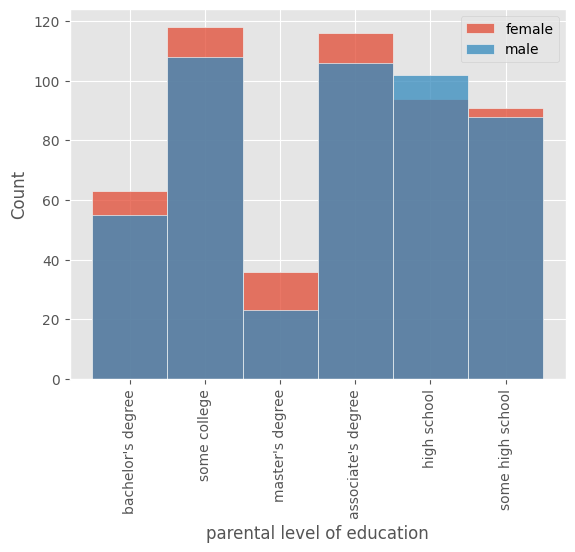

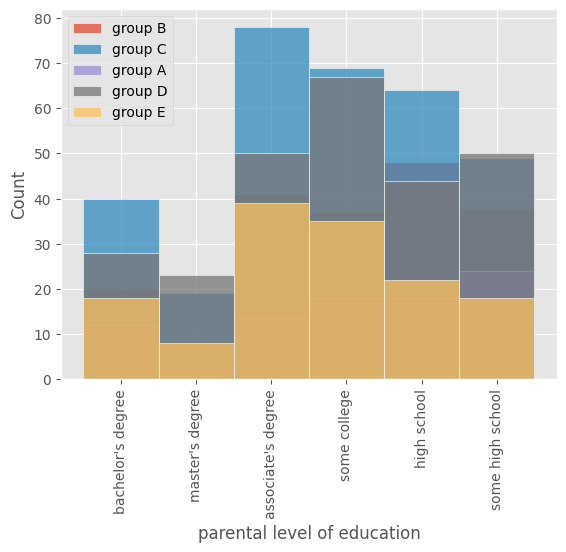

<Figure size 640x480 with 0 Axes>

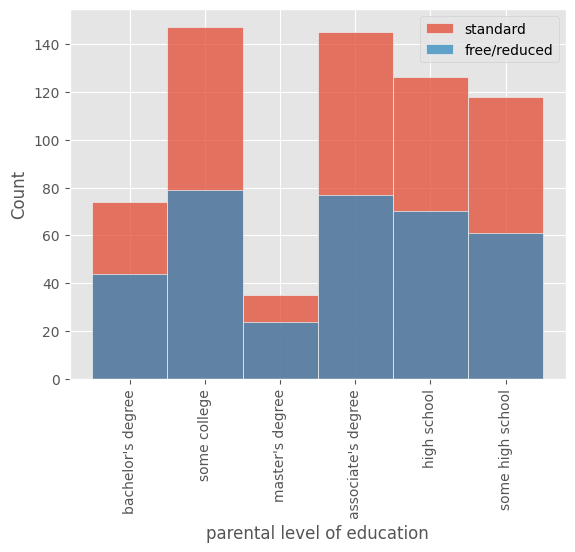

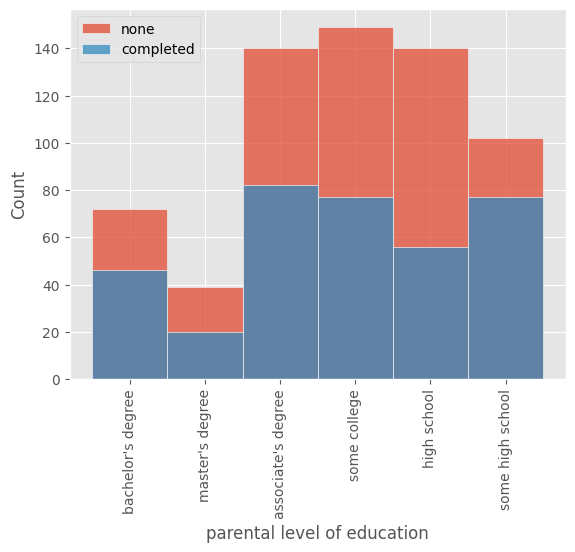

<Figure size 640x480 with 0 Axes>

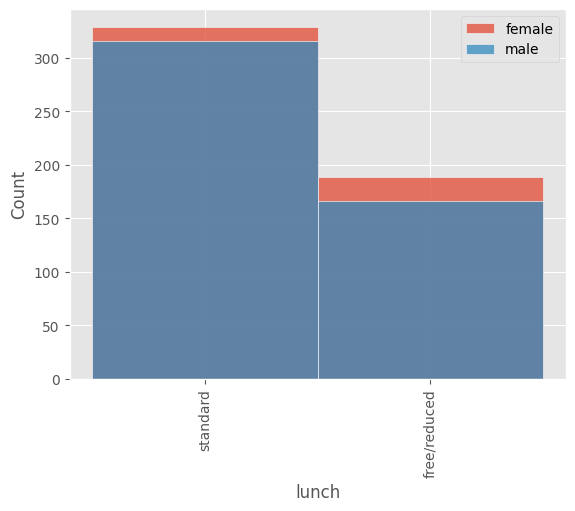

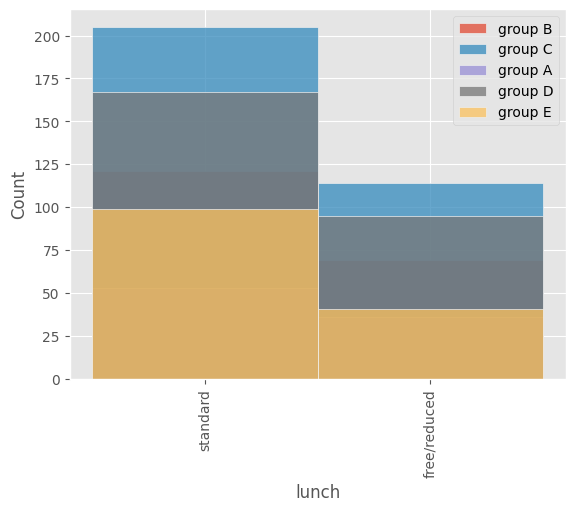

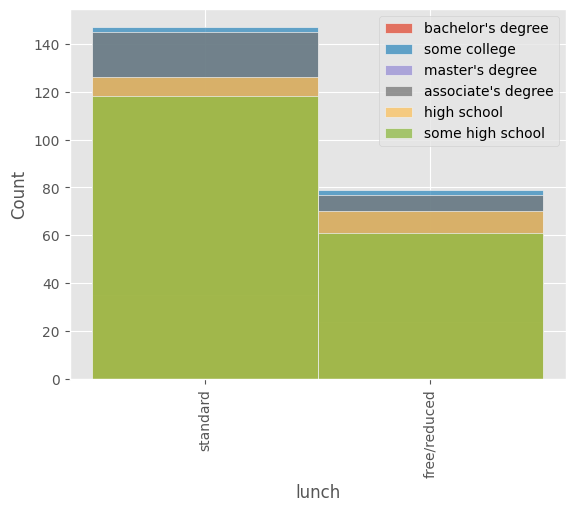

<Figure size 640x480 with 0 Axes>

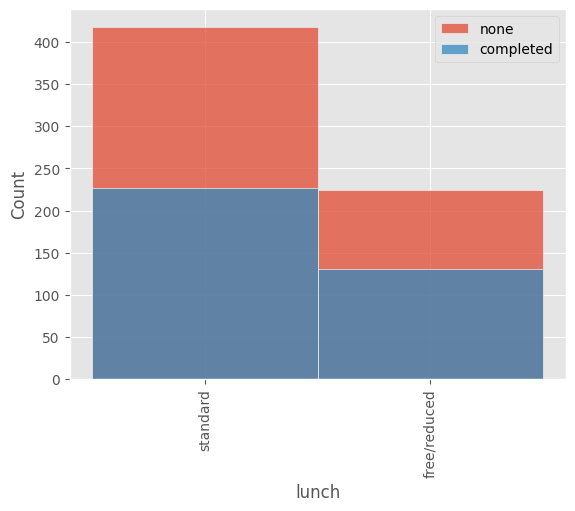

<Figure size 640x480 with 0 Axes>

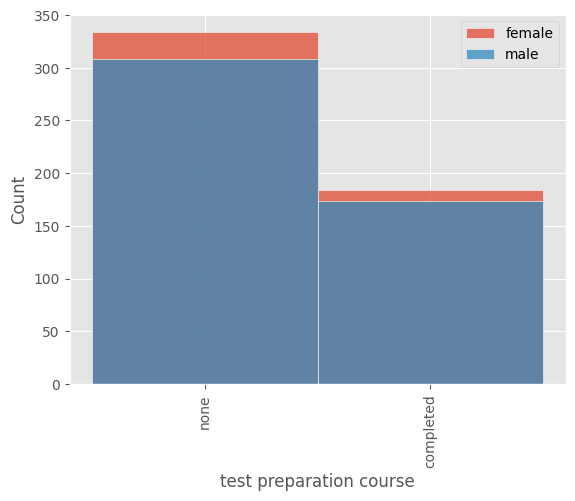

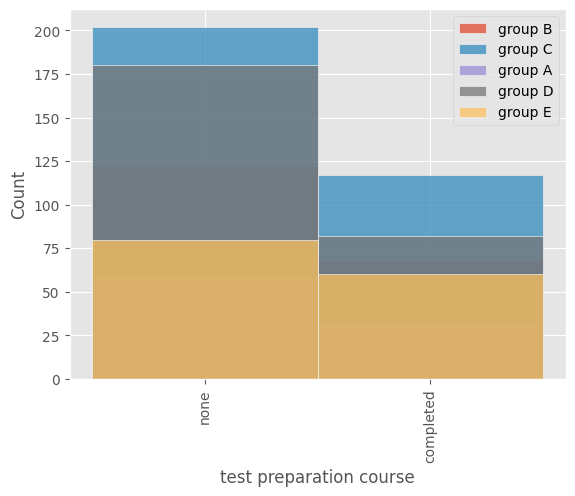

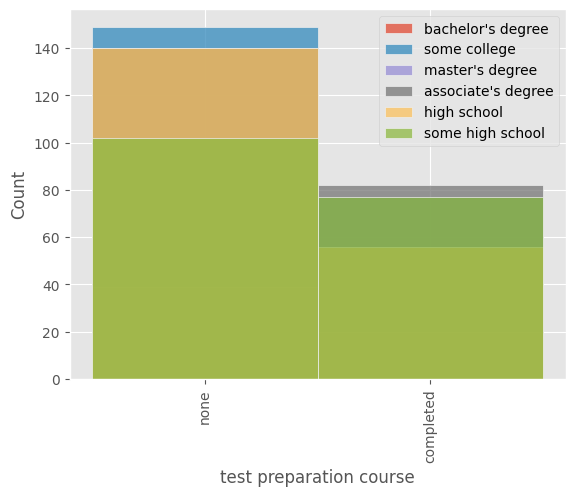

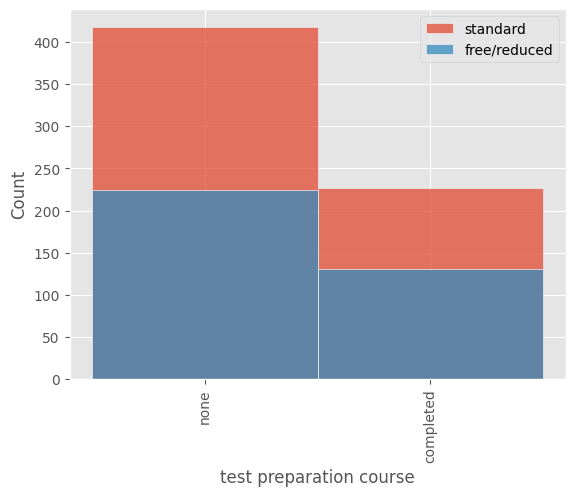

<Figure size 640x480 with 0 Axes>

In [91]:
for col in df.select_dtypes(include=['object']):           
    plt.figure()   
    for col2 in df.select_dtypes(include=['object']):
        plt.figure() 
        if len(df[col2].unique()) <9 and col !=col2 and col != 'mean score' and col2 != 'mean score' :
            for cat in df[col2].unique():
                #Data_A=Data[Data['column_y']==A]
                sns.histplot(df[df[col2]==cat][col],kde=False,label=cat)
            plt.legend()
            plt.xticks(rotation = 90)

<Axes: xlabel='gender'>

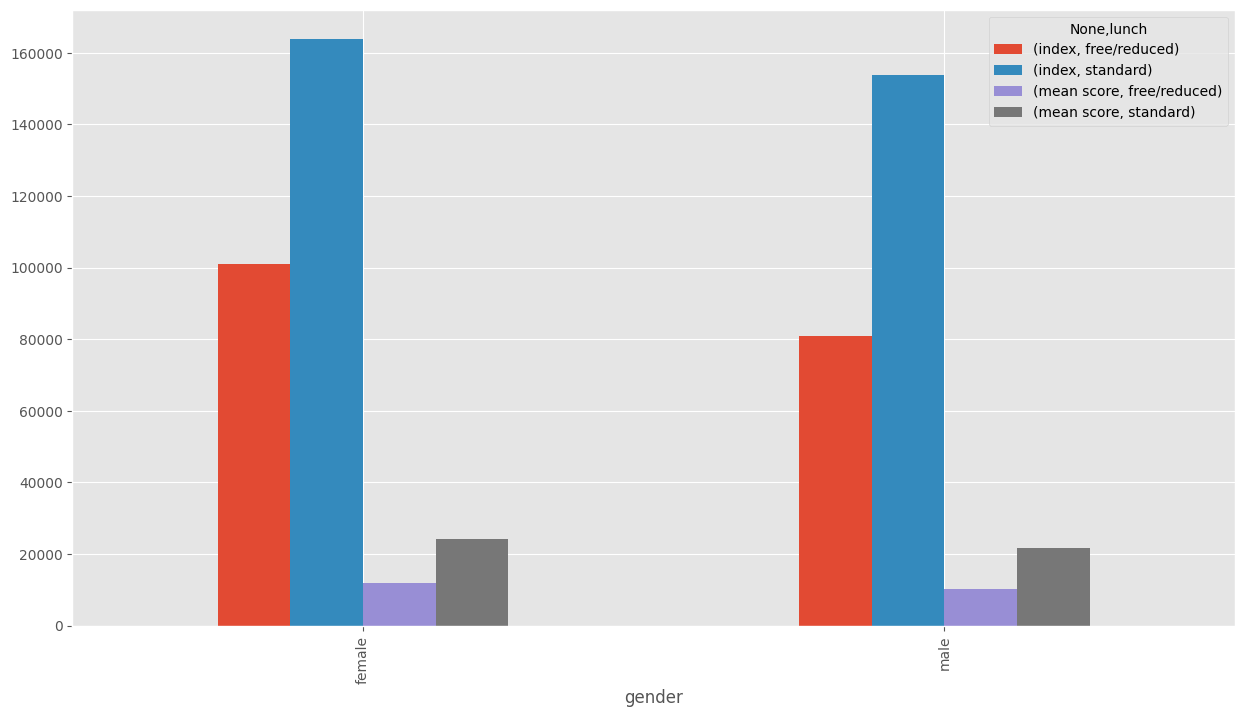

In [92]:
df.groupby(['gender','lunch']).count()
df1 = pd.pivot_table(df.reset_index(), index=['gender'], columns=['lunch'], fill_value=0, aggfunc=np.sum)
df1
df1.plot(kind = 'bar', figsize = (15,8))

In [93]:
Female_sum = df[(df['lunch'] =='standard')&(df['gender']=='female')]['gender'].count()
Female_percent = df[(df['gender']=='female')]['gender'].count()
Male_sum = df[(df['lunch'] =='standard')&(df['gender']=='male')]['gender'].count()
Male_percen=df[(df['gender']=='male')]['gender'].count()

total = pd.DataFrame([Female_sum,Male_sum], columns=['Total']).rename(index={0: 'Female/standard', 1: 'Male/standard'})
percent = pd.DataFrame([Female_sum/Female_percent,Male_sum/Male_percen], columns=['percent']).rename(index={0: 'Female/standard', 1: 'Male/standard'})

Data = pd.concat([total, percent], axis=1)
Data

,Total,percent
Female/standard,329,0.635135
Male/standard,316,0.655602


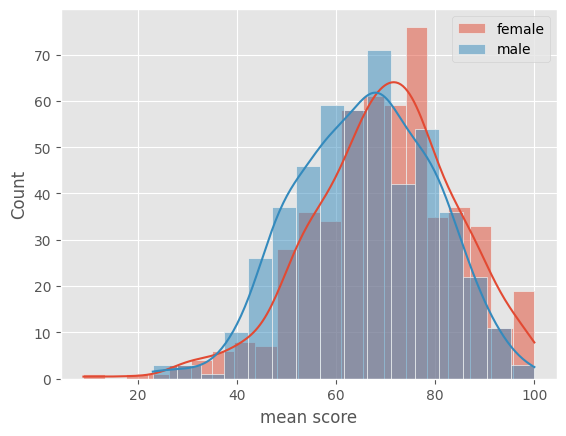

In [94]:
for col in df.select_dtypes(exclude=['object','int']):
    plt.figure()                                 
    for cat in df['gender'].unique():
        sns.histplot(df[df['gender']==cat][col],kde=True,label=cat)
    plt.legend()
    #get scatter_correlat object_target/col_float64 (use it only for object target class)

# [Step 5: Analyse Hypothese]()<a id="6"></a> <br>

- - Rate of 'gender' depending to each col => prove if the rate of 'gender' are not equal

In [95]:
from scipy.stats import ttest_ind                                                            
def t_test(col):
    alpha=0.02
    #=>array[True, False]           
    index_A=df['gender']=="female"
    index_B=df['gender']=="male"    
    #=>Data_A=Data[rows['column_y']==A] 
    if pd.api.types.is_numeric_dtype(df[col]):
        Data_A = df[index_A]
        Data_B = df[index_B]
        # dropna for eliminating NaN values for the test
        stat, p = ttest_ind(Data_A[col].dropna(), Data_B[col].dropna())                           
        if p < alpha:
            return 'H0 Rejetée X'  # col has a rate not equal for 'column_y' => col has an impact on column_y
        else:
            return 'H0 Non Rejetée'  # col has no significant impact on column_y
    else:
        return 'Not Numeric'  # The column is not numeric   

for col in df.columns:
    print(f'{col :-<50} {t_test(col)}')

gender-------------------------------------------- Not Numeric
race/ethnicity------------------------------------ Not Numeric
parental level of education----------------------- Not Numeric
lunch--------------------------------------------- Not Numeric
test preparation course--------------------------- Not Numeric
mean score---------------------------------------- H0 Rejetée X


# [Step 6 : Data Cleaning]()<a id="7"></a> <br>

- Encodage : (Only for object column)

In [96]:
from sklearn.preprocessing import LabelEncoder
def encodage(data):
    cod_dict = {}
    for col in data.select_dtypes('object'):
        cod_dict[col] = LabelEncoder()
        print(cod_dict.keys())
        print('classed found : ' , list(cod_dict[col].fit(data[col]).classes_))
        #Create a label (category) encoder object
        data[col] = cod_dict[col].fit_transform(data[col])
        print('Updates dataframe is : \n' ,data )
    #for inverse transform not important
    # data['score0'] = cod_dict['score0'].inverse_transform(data['score0'])         
    # print('Inverse Transform  : \n' ,data)
    return data

- - Train_test_split

([<matplotlib.patches.Wedge at 0x1d9889cfe80>,
 [Text(-0.8899187180267095, 0.6465637441936395, 'Data_train'),
  Text(0.8899187482945414, -0.6465637025335375, 'Data_test')],
 [Text(-0.48541020983275057, 0.3526711331965306, '80.0%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.0%')])

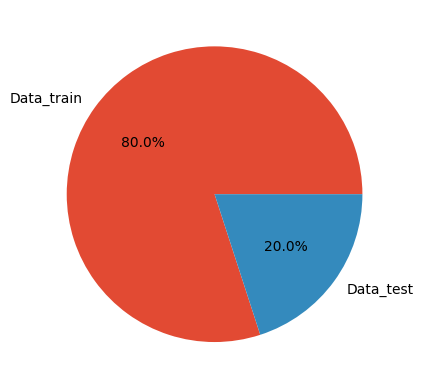

In [97]:
from sklearn.model_selection import train_test_split
Data_train , Data_test = train_test_split(df, test_size=0.2, random_state=0)
#chek if train_size==1-0.2 of all rows
plt.pie((Data_train.shape[0],Data_test.shape[0]), labels=('Data_train', 'Data_test'), autopct='%1.1f%%')

In [98]:
from sklearn.preprocessing import StandardScaler
def prep(data):
    # only for column object use it
    data = encodage(data)
    plt.figure(figsize=(15,5))  
    # alwayse use it
    X = data.drop('mean score',axis=1)
    y = data['mean score']
    # only for target regression
    sc = StandardScaler()
    X = sc.fit_transform(X)
    return X,y
X_train, y_train = prep(Data_train)
X_test, y_test = prep(Data_test)

dict_keys(['gender'])
classed found :  ['female', 'male']
Updates dataframe is : 
      gender race/ethnicity parental level of education         lunch  \
687       1        group D          associate's degree  free/reduced   
500       0        group D             master's degree      standard   
332       1        group E          associate's degree      standard   
979       0        group C          associate's degree      standard   
817       1        group D           bachelor's degree  free/reduced   
..      ...            ...                         ...           ...   
835       0        group C                 high school      standard   
192       0        group B            some high school      standard   
629       0        group C            some high school      standard   
559       1        group D            some high school      standard   
684       1        group B                some college      standard   

    test preparation course  mean score  
687       

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

# [Step 7: Model Building (If Applicable):]()<a id="8"></a> <br>

- Train the model

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# [Step 8: Model Evaluation:]()<a id="9"></a> <br>
- Evaluate the model's performance on the testing set using relevant metrics.

In [103]:
score = model.score(X_test,y_test)
print(score)
y_pred = model.predict(X_test)

0.15042007410861125


- - Only for regression 

accuracy_score :  0.15042007410861125
MAE :  10.50744359935747
MSE :  171.35610811065624
RMSE :  13.090305883005799
MAE2 :  9.041458598381759


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_17132\2097709077.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


<Axes: xlabel='mean score', ylabel='Density'>

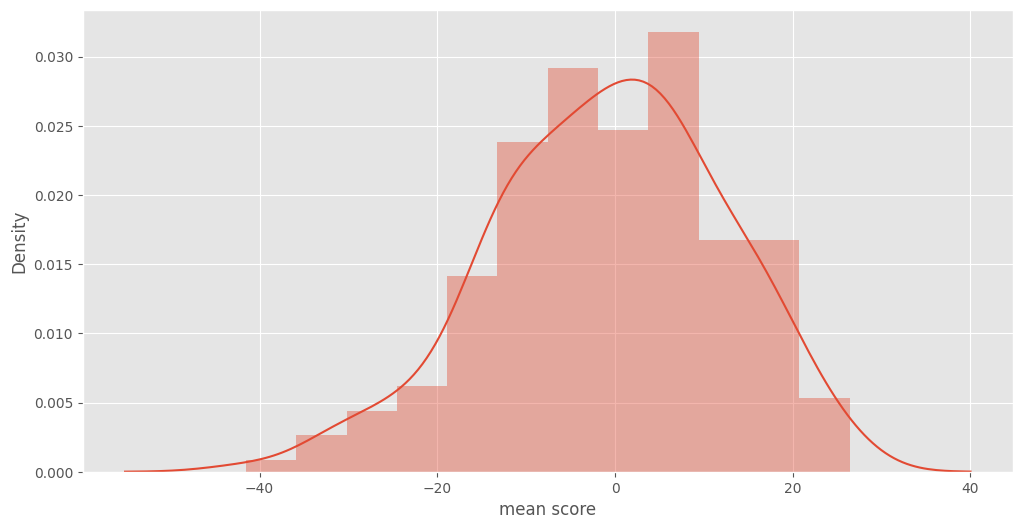

In [105]:
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,median_absolute_error

def scoring(y_test,y_pred):
    # Coefficient of Determination : R2= -((y-y_pred)**2/(y-y_mean)**2)   #this model describe in % the variation of y
    acc=score

    # Metrics.mean_absolute_error : 1/m(y-y_pred)  #is to detecte the big & catastrophic linéaire Error 
    MAE = mean_absolute_error(y_test,y_pred)           

    # Metrics.mean_squared_error: 1/m(y-y_pred)**2  #is to detecte the big & catastrophic exponentiell Error 
    MSE = mean_squared_error(y_test,y_pred)

    # Metrics.root.mean_squared_error: sqrt(1/m(y-y_pred)**2)  #is to detecte the big & catastrophic exponentiell Error 
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

    # Metrics.median_absolute_error : Median(y-y_pred)  #used to elimine aberant values
    MAE2 = median_absolute_error(y_test,y_pred)          

    return acc,MAE,MSE,RMSE,MAE2

#compare (accuracy acc, MAS,MSE,MAE)
scoring(y_test,y_pred)      
print("accuracy_score : " , scoring(y_test,y_pred)[0])
print("MAE : ",  scoring(y_test,y_pred)[1] )
print("MSE : " , scoring(y_test,y_pred)[2] )
print("RMSE : " , scoring(y_test,y_pred)[3] )
print("MAE2 : " , scoring(y_test,y_pred)[4] )
# Performance of model : #visuel how many ele have errors & if it's normal statistiq
plt.figure(figsize = (12,6))
sns.distplot(y_test - y_pred)     

# [Step 9: Make Pipline:]()<a id="10"></a> <br>

In [106]:
def prep2(data):
    # alwayse use it
    X = data.drop('mean score',axis=1)
    y = data['mean score']
    return X,y
X_train, y_train = prep2(Data_train)
X_test, y_test = prep2(Data_test)

In [116]:
from sklearn.preprocessing import PolynomialFeatures,RobustScaler, StandardScaler,OneHotEncoder
#MinMaxScaler,[Normalizer(copy=True, norm=''l1'or'max'')modif suivant row,MaxAbsScaler(copy=True)modif suivant columns,FunctionTransformer(func=fun1 or lambda x: x**0.1,validate = True),Binarizer(threshold = 1.0),
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, make_union

# Use of all models in order to eliminate overfitting => RadForst, AdBoost, SVM, KNN 
num_features = [col for col in df.select_dtypes(exclude=['object']) if col != 'mean score']
categ_features = [col for col in df.select_dtypes(include=['object']) if col != 'mean score']
#Eliminate nan val+StandardScaler
num_pipeline_norm = make_pipeline(KNNImputer(),RobustScaler())
#pas besoin de normalisation (RobustScaler()) (SimpleImputer(missing_values=np.nan, strategy='mean',fill_value=-9)
num_pipeline = make_pipeline(KNNImputer())
# strategy = 'most_frequent',mean,median,constant with fill_value=-99
categ_pipeline = make_pipeline(KNNImputer(),OneHotEncoder())

preprocessor_norm = make_column_transformer((num_pipeline_norm,num_features),(categ_pipeline,categ_features))
preprocessor = make_column_transformer((num_pipeline,num_features),(categ_pipeline,categ_features))
#================Elimin Overfitting (score_train < best_score < score_crossvalue) #=============#
#(simpleImputer, StandardScaler) , (simpleImputer, OneHotEncoder)
#    (Numerical_pipeline                Categorical_pipeline)
#                      (Column_transformer                                SGDClassifier)
#                                               model_Pipeline
#Model Regressor#===================================#=========================================
import xgboost as xgb
mod_XGB = make_pipeline(preprocessor_norm,PolynomialFeatures(),xgb.XGBRegressor())
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
mod_LG = make_pipeline(preprocessor_norm,PolynomialFeatures(),LinearRegression())
mod_Ridge = make_pipeline(preprocessor_norm,PolynomialFeatures(),Ridge(alpha=1.0,random_state=33))
mod_Lasso = make_pipeline(preprocessor_norm,PolynomialFeatures(),Lasso(alpha=1.0,random_state=33))
mod_SGDR = make_pipeline(preprocessor_norm,PolynomialFeatures(),SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber') )
from sklearn.svm import SVR
mod_SVR = make_pipeline(preprocessor_norm,PolynomialFeatures(),SVR())
from sklearn.tree import DecisionTreeRegressor
mod_tree = make_pipeline(preprocessor_norm,PolynomialFeatures(),DecisionTreeRegressor( max_depth=3,random_state=33))
from sklearn.neighbors import KNeighborsRegressor
mod_KNeighbor = make_pipeline(preprocessor_norm,PolynomialFeatures(),KNeighborsRegressor(n_neighbors = 5))
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
mod_Forest = make_pipeline(preprocessor_norm,PolynomialFeatures(),RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33))
mod_Gradient = make_pipeline(preprocessor_norm,PolynomialFeatures(),GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate = 1.5 ,random_state=33))

models = {'XGB':mod_XGB,'LinearRegression':mod_LG,'Ridge':mod_Ridge,'Lasso':mod_Lasso,'SGDRegressor':mod_SGDR,'SVR':mod_SVR,
    'DecisionTreeRegressor':mod_tree,'KNeighborsRegressor':mod_KNeighbor,'RandomForestRegressor':mod_Forest,'GradientBoostingRegressor':mod_Gradient}
#Fitting Regressor#=================================#=========================================
accuracy_dict = {}
for nam, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Store accuracy in dictionary
    accuracy_dict[nam] = scoring(y_test, y_pred)[0]
    print('Result of model', nam)
    print("Accuracy Score: ", scoring(y_test, y_pred)[0])
    print("MAE: ", scoring(y_test, y_pred)[1])
    print("MSE: ", scoring(y_test, y_pred)[2])
    print("RMSE: ", scoring(y_test, y_pred)[3])
    print("MAE2: ", scoring(y_test, y_pred)[4])
# Find the model with the best accuracy
best_model = max(accuracy_dict, key=accuracy_dict.get)
print(f"The best model is {best_model} with an accuracy of {accuracy_dict[best_model]}")

Result of model XGB
Accuracy Score:  0.15042007410861125
MAE:  12.20430685043335
MSE:  222.52975350965986
RMSE:  14.917431196746303
MAE2:  11.257518768310547
Result of model LinearRegression
Accuracy Score:  0.15042007410861125
MAE:  10.831962682893108
MSE:  183.24166695899493
RMSE:  13.53667857928949
MAE2:  8.697471645649532
Result of model Ridge
Accuracy Score:  0.15042007410861125
MAE:  10.792221906863492
MSE:  181.7394125822206
RMSE:  13.481076091403853
MAE2:  8.672615842868382
Result of model Lasso
Accuracy Score:  0.15042007410861125
MAE:  10.637710625482049
MSE:  182.0984755041602
RMSE:  13.494386814678176
MAE2:  9.0
Result of model SGDRegressor
Accuracy Score:  0.15042007410861125
MAE:  60.60639831526919
MSE:  3874.683432873681
RMSE:  62.24695520966211
MAE2:  60.994177089083394
Result of model SVR
Accuracy Score:  0.15042007410861125
MAE:  10.429442376720075
MSE:  171.92911424161363
RMSE:  13.112174275901523
MAE2:  8.9494478988331
Result of model DecisionTreeRegressor
Accuracy 

In [122]:
# Optimisation(hyperparametres) GridSearch :#=============================#========================
from sklearn.model_selection import GridSearchCV #or RandomizedSearchCV
hyper_params = {'polynomialfeatures__degree':[2,3,4],
                }          
grid = GridSearchCV(mod_XGB, hyper_params,cv=4).fit(X_train,y_train)    #cv=3ou4ou5 == ndr of split
# grid = RandomizedSearchCV(mod_SVM, hyper_params, scoring='recall',cv=4, n_iter=40).fit(X_train,y_train)   #n_iter == 40 iteration by chance
print(grid.best_score_)                      #get best score in GridSearchCV
print(grid.best_params_)                     #get best parametres
model_grid = grid.best_estimator_            #get best model
# 'Fit :
model_grid.fit(X_train,y_train)
y_pred = model_grid.predict(X_test)
# 'Classification_report:
scoring(y_test,y_pred)                           #compare (accuracy acc, score f1, cm)
# use crosse_validation_score cv  #tr_score : Decreasess ,increases / val_score : stagnate

-0.13137256472804626
{'polynomialfeatures__degree': 4}


(0.15042007410861125,
 12.118503189086914,
 221.27476030478851,
 14.875307065899127,
 11.051301956176758)